In [1]:
# Comparing OSPEX fits to the RHESSI microflares using different versions
# of the OSPEX CHIANTI dbase files - focusing on the T,EM values out
# Fit was done using f_vth + bpow in OSPEX
# 
# Using 
# v5.2: 
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v52.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v52.sav
# v7.1 (sunkit-spex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_1_250_v71.sav
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_1_10_v71.sav
# v9.0.1 (ospex default)
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_cont_01_250_unity_v901.geny
#   https://hesperia.gsfc.nasa.gov/ssw/packages/xray/dbase/chianti/chianti_lines_07_12_unity_v901_t41.geny
# v10.1 (newly generated by me using approx v9 setup for T and \lambda)
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_cont_1_250_unity_v101_t41.geny
#   https://github.com/ianan/fvth_stuff/blob/main/idl/chianti_lines_1_12_unity_v101_t41.geny
# 
# 6-Feb-2024    IGH

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sunpy.io.special import read_genx
from astropy.time import Time

import warnings
warnings.simplefilter('ignore')

matplotlib.rcParams['font.size']=14

In [3]:
# Load in the results files
r05=read_genx('wee_2024_vth52_bpow.genx')
r07=read_genx('wee_2024_vth71_bpow.genx')
r09=read_genx('wee_2024_vth90_bpow.genx')
r10=read_genx('wee_2024_vth101_bpow.genx')
# r10t=read_genx('wee_2024_vth101_t100_bpow.genx')

In [4]:
# Restructure things to make it easier to work with
tmk05=[r["OSX_P"][1] for r in r05["SAVEGEN0"]]
em05=[r["OSX_P"][0]*1e49 for r in r05["SAVEGEN0"]]

tmk07=[r["OSX_P"][1] for r in r07["SAVEGEN0"]]
em07=[r["OSX_P"][0]*1e49 for r in r07["SAVEGEN0"]]

tmk09=[r["OSX_P"][1] for r in r09["SAVEGEN0"]]
em09=[r["OSX_P"][0]*1e49 for r in r09["SAVEGEN0"]]

tmk10=[r["OSX_P"][1] for r in r10["SAVEGEN0"]]
em10=[r["OSX_P"][0]*1e49 for r in r10["SAVEGEN0"]]

# tmk10t=[r["OSX_P"][1] for r in r10t["SAVEGEN0"]]
# em10t=[r["OSX_P"][0]*1e49 for r in r10t["SAVEGEN0"]]

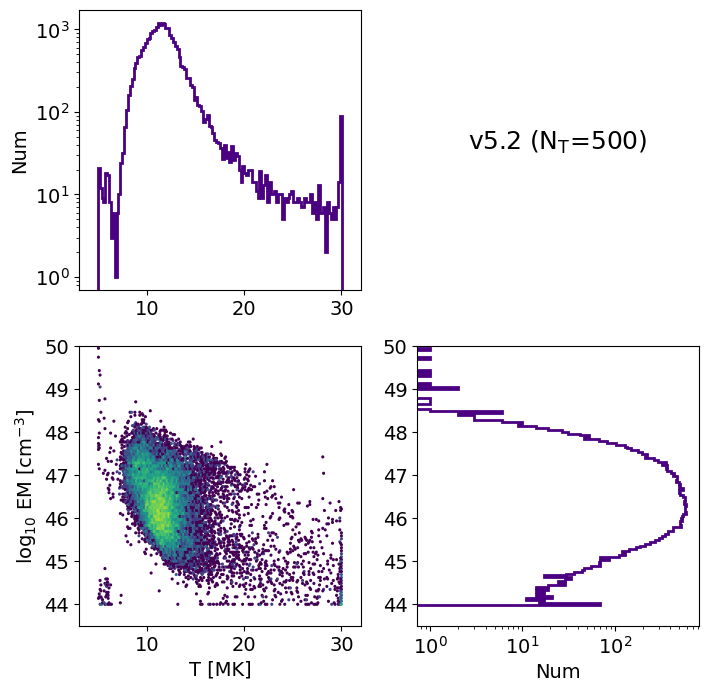

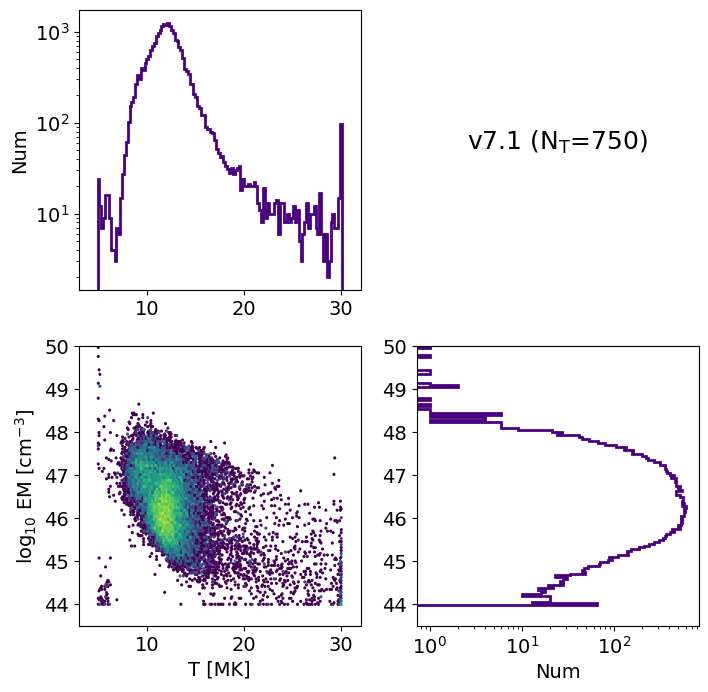

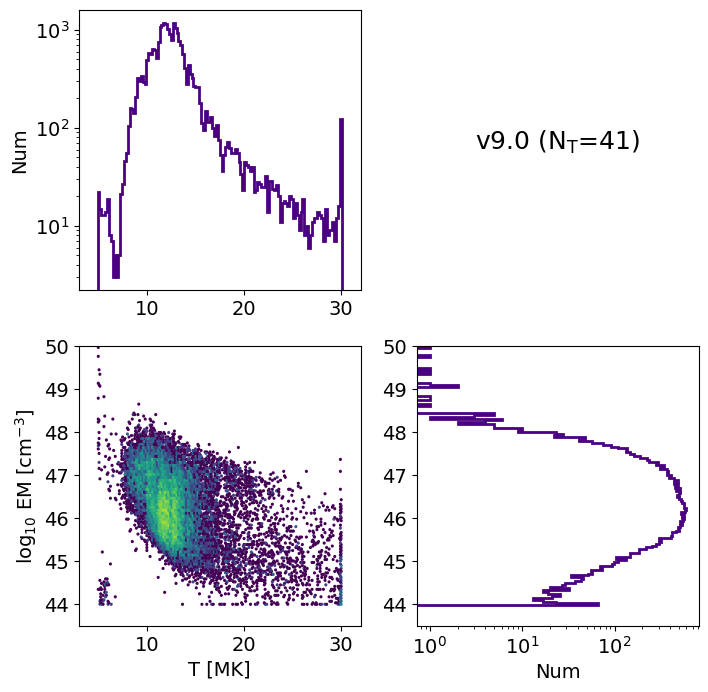

In [5]:
def corner_tem(tmk,em,title):
    gs=150
    vmax=50
    tmkr=[3,32]
    emr=[43.5,50]
    fig,axs=plt.subplots(2,2,figsize=(8,8))
    hex=axs[1,0].hexbin(tmk,np.log10(em),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
    axs[1,0].set_xlim(tmkr)
    axs[1,0].set_ylim(emr)
    axs[1,0].set_ylabel('log$_{10}$ EM [cm$^{-3}$]')
    axs[1,0].set_xlabel('T [MK]')
    # axs[1,0].set_title(title)
    # fig.colorbar(hex,ax=axs[1,0])

    axs[0,1].text(0.5,0.5,title,ha='center',fontsize=18)

    axs[0,0].hist(tmk,bins=gs,range=tmkr,\
                  histtype='step',lw=2,color='indigo')
    axs[0,0].set_xlim(tmkr)
    axs[0,0].set_ylabel('Num')
    axs[0,0].set_yscale('log')

    axs[1,1].hist(np.log10(em),bins=gs,range=emr,\
                  histtype='step', orientation="horizontal",lw=2,color='indigo')
    axs[1,1].set_xlabel('Num')
    axs[1,1].set_ylim(emr)
    axs[1,1].set_xscale('log')

    axs[0,1].axis('off')

    plt.show()
    
    return


corner_tem(tmk05,em05,'v5.2 (N$_\mathrm{T}$=500)')
corner_tem(tmk07,em07,'v7.1 (N$_\mathrm{T}$=750)')
corner_tem(tmk09,em09,'v9.0 (N$_\mathrm{T}$=41)')
# corner_tem(tmk10,em10,'v10.1 (N$_\mathrm{T}$=41)')
# corner_tem(tmk10t,em10t,'v10.1 (N$_\mathrm{T}$=100)')

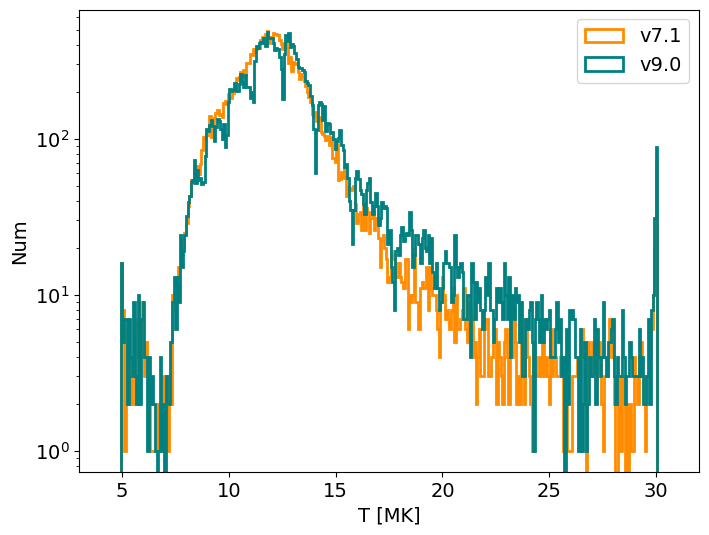

In [6]:
gs=400
tmkr=[3,32]
fig,ax=plt.subplots(figsize=(8,6))
# ax.hist(tmk05,bins=gs,range=tmkr,histtype='step',lw=2,color='indigo',label='v5.2')
ax.hist(tmk07,bins=gs,range=tmkr,histtype='step',lw=2,color='darkorange',label='v7.1')
ax.hist(tmk09,bins=gs,range=tmkr,histtype='step',lw=2,color='teal',label='v9.0')
# ax.hist(tmk10,bins=gs,range=tmkr,histtype='step',lw=2,color='dodgerblue',label='v10.1')
ax.set_xlim(tmkr)
ax.set_ylabel('Num')
ax.set_xlabel('T [MK]')
ax.set_yscale('log')
plt.legend()
plt.show()

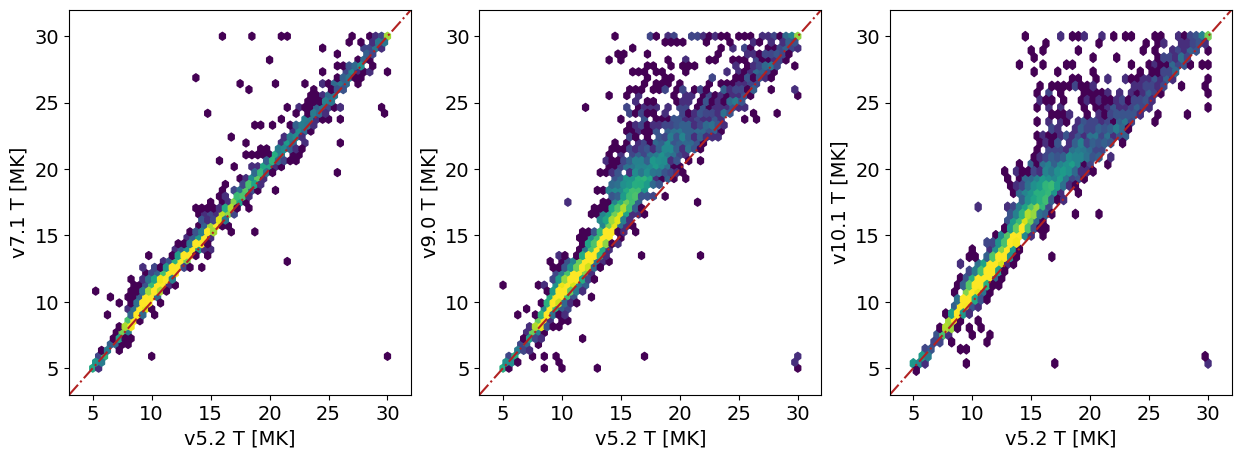

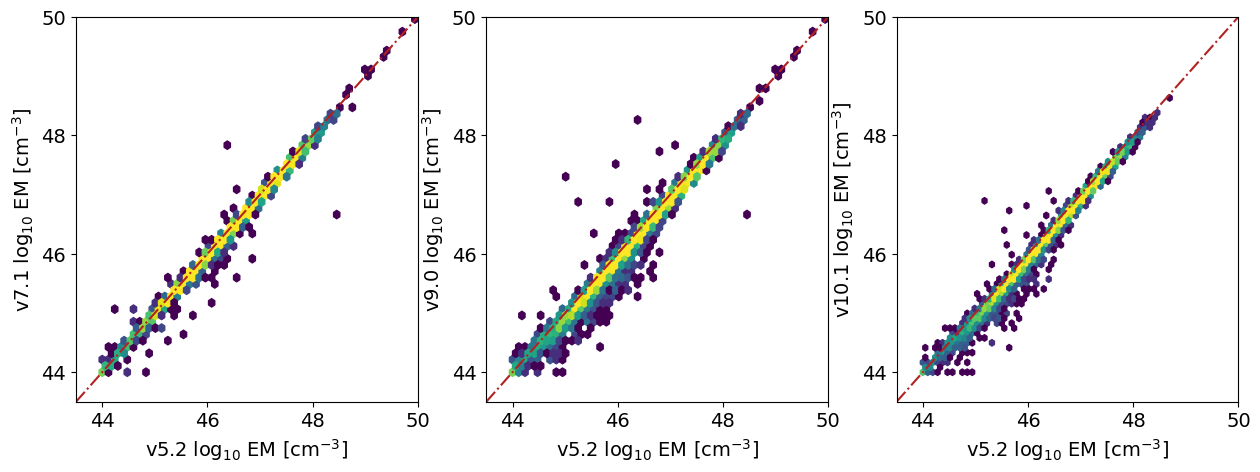

In [7]:
tmkr=[3,32]
gs=50
vmax=200
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(tmk05,tmk07,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 T [MK]')
axs[1].hexbin(tmk05,tmk09,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 T [MK]')
axs[2].hexbin(tmk05,tmk10,gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 T [MK]')

for ax in axs:
    ax.set_xlim(tmkr)
    ax.set_ylim(tmkr)
    ax.plot(tmkr,tmkr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.set_xlabel('v5.2 T [MK]')
plt.show()
# ------------------------------------------------------
emr=[43.5,50]
fig,axs=plt.subplots(1,3,figsize=(15,5))
axs[0].hexbin(np.log10(em05),np.log10(em07),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[0].set_ylabel('v7.1 log$_{10}$ EM [cm$^{-3}$]')
axs[1].hexbin(np.log10(em05),np.log10(em09),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[1].set_ylabel('v9.0 log$_{10}$ EM [cm$^{-3}$]')
axs[2].hexbin(np.log10(em05),np.log10(em10),gridsize=gs,cmap='viridis',\
          norm=matplotlib.colors.LogNorm(vmin=1, vmax=vmax))
axs[2].set_ylabel('v10.1 log$_{10}$ EM [cm$^{-3}$]')

for ax in axs:
    ax.set_xlim(emr)
    ax.set_ylim(emr)
    ax.plot(emr,emr,ls='-.',color='firebrick')
    ax.xaxis.set_major_locator(plt.MaxNLocator(4))
    ax.yaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('v5.2 log$_{10}$ EM [cm$^{-3}$]')
plt.show()